DEEP NEURAL NETWORK WITH PYTORCH USING MNIST DATASET.

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image


THE ORIGINAL DATA SET CAN BE FOUND IN http://yann.lecun.com/exdb/mnist/

Import the data using the mlxtend library



In [58]:
from mlxtend.data import loadlocal_mnist
import platform

if not platform.system() == 'Windows':
    Xtrain, ytrain = loadlocal_mnist(images_path='train-images.idx3-ubyte',
            labels_path='train-labels.idx1-ubyte')

else:
    Xtrain, ytrain = loadlocal_mnist(images_path='train-images.idx3-ubyte',
            labels_path='train-labels.idx1-ubyte')

if not platform.system() == 'Windows':
    Xtest, ytest = loadlocal_mnist(
            images_path='train-images.idx3-ubyte',
            labels_path='train-labels.idx1-ubyte')

else:
    Xtest, ytest = loadlocal_mnist(
            images_path='t10k-images.idx3-ubyte',
            labels_path='t10k-labels.idx1-ubyte')
print('\n>>> END <<<')


>>> END <<<


In [59]:
# Import all pytorch libraries
import torch
import torch.nn as nn
import torch.utils.data as td
import matplotlib.pyplot as plt
from time import time

# Set random seed for reproducability
torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.13.1+cu116


In [60]:
# Convert your  Training Data into Tensor
train_x = torch.Tensor(Xtrain).float()
train_y = torch.Tensor(ytrain).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=50,
    shuffle=False)

In [61]:
# Convert your  Test Data into Tensor
test_x = torch.Tensor(Xtest).float()
test_y = torch.Tensor(ytest).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=50,
    shuffle=False, num_workers=4)
print('Ready to load data')

Ready to load data


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [62]:
# I am using two hidden layers with 128 and 64 units in the layers. Input Features is 784 since we have a 28*28 images and output is 10 since we have 10 labels(0 to 9)
# I am using the Relu function twice and LogSoftmax at the output end
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [63]:
# Define your training model function

def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0

    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        # feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate
        loss.backward()
        optimizer.step()

    # Return average loss
    avg_loss = train_loss / (batch + 1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

In [64]:
# Define your training model function
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target == predicted).item()

    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss / batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))

    # return average loss for the epoch
    return avg_loss

In [65]:
# Time to train your model using SGD optimizer to adjust weights, training over 25 epochs with 0.002 learning rate


loss_criteria = nn.CrossEntropyLoss()

# Use an "SGD" optimizer to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 25 epochs
epochs = 25
for epoch in range(1, epochs + 1):
    # print the epoch number
    print('Epoch: {}'.format(epoch))

    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)

    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)

    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1
Training set: Average loss: 0.357638
Validation set: Average loss: 0.185482, Accuracy: 56566/60000 (94%)

Epoch: 2
Training set: Average loss: 0.154868
Validation set: Average loss: 0.125575, Accuracy: 57650/60000 (96%)

Epoch: 3
Training set: Average loss: 0.113167
Validation set: Average loss: 0.095611, Accuracy: 58217/60000 (97%)

Epoch: 4
Training set: Average loss: 0.088996
Validation set: Average loss: 0.078537, Accuracy: 58521/60000 (98%)

Epoch: 5
Training set: Average loss: 0.071999
Validation set: Average loss: 0.068329, Accuracy: 58682/60000 (98%)

Epoch: 6
Training set: Average loss: 0.059309
Validation set: Average loss: 0.059133, Accuracy: 58854/60000 (98%)

Epoch: 7
Training set: Average loss: 0.049131
Validation set: Average loss: 0.052425, Accuracy: 58988/60000 (98%)

Epoch: 8
Training set: Average loss: 0.041253
Validation set: Average loss: 0.044938, Accuracy: 59117/60000 (99%)

Epoch: 9
Training set: Average loss: 0.034639
Validation set: Average loss: 0.03

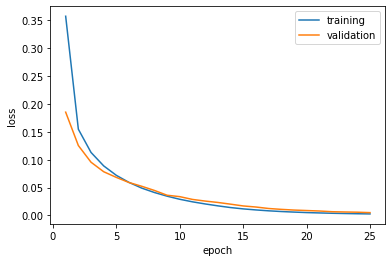

In [66]:
# Compare your training loss with test loss across the epochs to confirm overfitting did not occur. 

from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [67]:
# Checking your model parameters

for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].numpy())

0.weight 
 [[-0.00026739  0.0191587  -0.02939447 ...  0.02193558  0.0037326
   0.00206033]
 [-0.01977709 -0.01498127 -0.01044241 ... -0.02026462 -0.00596242
  -0.02994578]
 [-0.02014851  0.01489857 -0.03327596 ... -0.02034389  0.00118167
   0.00802764]
 ...
 [ 0.00177887 -0.02953604  0.00847977 ... -0.00365933  0.00358359
   0.03000653]
 [-0.02325427 -0.02204831 -0.00639533 ...  0.01152954 -0.03235804
  -0.0157676 ]
 [ 0.03094425  0.00658512  0.01254977 ...  0.02855393  0.03498402
  -0.01052008]]
0.bias 
 [-0.03207037 -0.00535109  0.0044176  -0.02110947  0.02225574  0.01295186
  0.01580637  0.02721006  0.02391339 -0.01566105 -0.00894803  0.02217082
  0.00550203  0.00700127 -0.00304629 -0.02495546 -0.03344035 -0.0024478
 -0.01236635  0.0128282  -0.00479541 -0.01905845 -0.00517931  0.02266741
  0.03236941 -0.0356356   0.0028869  -0.00810308  0.02549939 -0.01045082
 -0.02015546 -0.00567064  0.02184537 -0.01060371  0.00309929  0.0339687
 -0.01892555 -0.00789491 -0.02070204 -0.0077589  -0.0

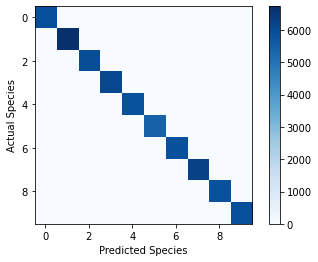

In [68]:
# Viewing your model using confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(Xtest).float()
_, predicted = torch.max(model(x).data, 1)

cm = confusion_matrix(ytest, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(10)
# plt.xticks(tick_marks, 10, rotation=45)
# plt.yticks(tick_marks, 10)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [47]:
# Save your model for reuse 

model_file = 'models/MNISTclassifier.pt'
torch.save(model.state_dict(), model_file)
del model #Deleting model parameters
print('model saved as', model_file)

model saved as models/MNISTclassifier.pt


In [ ]:
# You can use your model to predict new features as seen below

# New features
# x_new = define new features 
# print ('New sample: {}'.format(x_new))

# Create a new model class and load weights
model = Mymnist()
model.load_state_dict(torch.load(model_file))

# Set model to evaluation mode
model.eval()

# Get a prediction for the new data sample
# x = torch.Tensor(x_new).float()
# _, predicted = torch.max(model(x).data, 1)

# print('Prediction:',classes[predicted.item()])